In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Učitavanje podataka

In [0]:
import nyutransforms as T
import nyudepth as nyu
import torch.utils.data as data

transform = T.Compose([T.ToTensor(), T.Transpose()])
dataset = nyu.NYUDepthV2Dataset('/content/drive/My Drive/zavrsni/data/nyu_depth_v2_labeled.mat', transform=transform)
dataloader = data.DataLoader(dataset, batch_size=1, shuffle=True)

Test

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 69251951.60it/s]
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


1086818.0


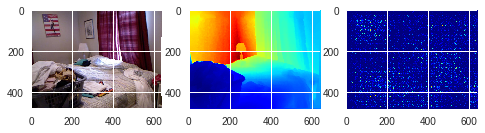

851281.625


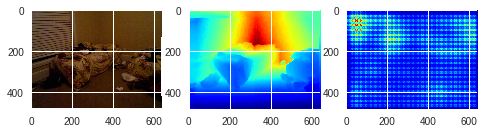

In [7]:
import torch.optim as optim
import loss as L
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
import mynn

net = mynn.create_mynet()
optimizer = optim.Adam(net.parameters())
berHu = L.ReverseHuberLoss()
for i, sample in enumerate(dataloader):
    if i == 2:
        break

    inputs, depths = sample['image'], sample['depth']
    optimizer.zero_grad()

    outputs = net(inputs)
    outputs = F.interpolate(outputs, size=(480, 640), mode='bilinear')
    outputs = torch.reshape(outputs, (outputs.shape[0], outputs.shape[2], outputs.shape[3]))
    loss = berHu(outputs, depths)
    loss.backward()
    optimizer.step()

    print(loss.item())

    img = inputs[0].detach().numpy().transpose((1, 2, 0))
    depth = depths[0].detach().numpy()
    depth_pred = outputs[0].detach().numpy()
    plt.subplot(1, 3, 1)
    plt.imshow(img.astype('uint8'))
    plt.subplot(1, 3, 2)
    plt.imshow(depth, cmap='jet')
    plt.subplot(1, 3, 3)
    plt.imshow(depth_pred, cmap='jet')
    plt.show()